## **Blinkit Data Analysis & EDA Project**

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("BlinkIT Grocery Data.csv")

In [46]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [47]:
# Checking No. of Rows and Columns
size = df.shape
print(f"Data have {size[0]} rows and {size[1]} Columns")

Data have 8523 rows and 12 Columns


## **Data Cleaning**

In [ ]:
# Checking for Inforamtion, Null Values in Dataframe
df.info()

In [49]:
# Filling Null Values using Mean in Item Weight Column
df['Item Weight'].fillna(df['Item Weight'].mean(),inplace=True)

In [50]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [52]:
# Lets Clean the Data and and transform it into two types.
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':"Low Fat", 'low fat': "Low Fat","reg":"Regular"})

In [53]:
# Item Fat Content Column Cleaned
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## **Buisness Requirment**

## **KPI's Requirment**

In [54]:
# Total Sales
total_sales = df['Sales'].sum()

In [55]:
# Average Sales
Average_sales = df['Sales'].mean()

In [57]:
# Number of Item Sold
number_of_item_sold = df['Sales'].count()

In [58]:
# Average Rating
average_rating = df['Rating'].mean()

In [68]:
# Display Data
print(f"Total Sales = ${total_sales:,.1f}")
print(f"Average Sales = ${Average_sales:,.1f}")
print(f"number_of_item_sold = ${number_of_item_sold:,.1f}")
print(f"average_rating = {average_rating:,.1f}")

Total Sales = $1,201,681.5
Average Sales = $141.0
number_of_item_sold = $8,523.0
average_rating = 4.0


## **Chart's Requirments**

#### Total Sales by Fat Content

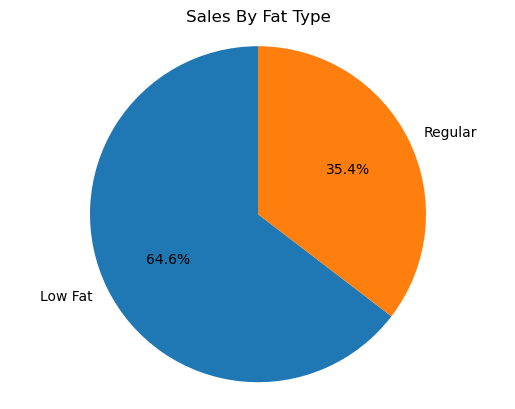

In [84]:
#Pie Chart of Total Sales by Fat Type 

sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index,autopct='%.1f%%',startangle=90)
plt.title("Sales By Fat Type")
plt.axis('equal')
plt.show()

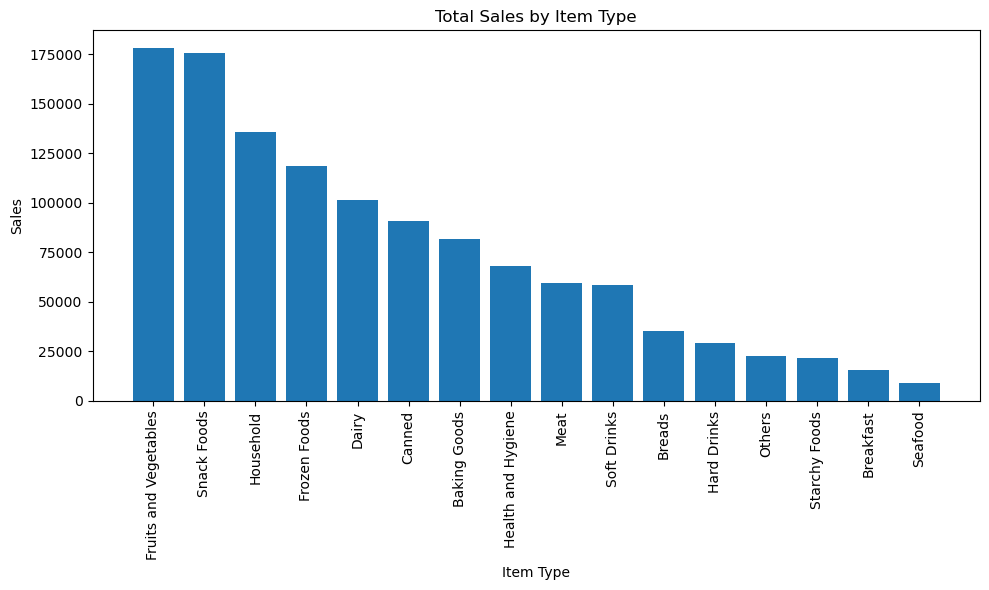

In [106]:
# Total Sales by Item Type
sales_by_item_type = df.groupby(df['Item Type'])['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(sales_by_item_type.index, sales_by_item_type.values)
plt.xticks(rotation=90)
plt.title("Total Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

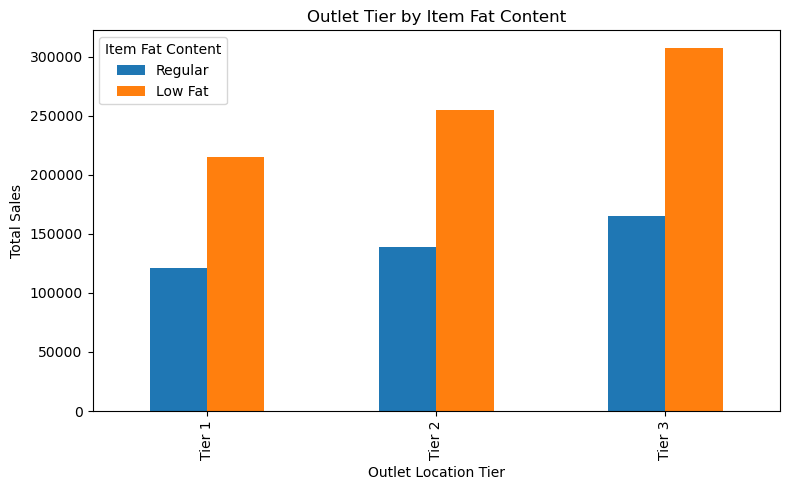

In [115]:
# Fat Content by Outlet for Total Sales
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]


ax = grouped.plot(kind='bar',figsize=(8,5), title='Outlet Tier by Item Fat Content')
plt.xlabel("Outlet Location Tier")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

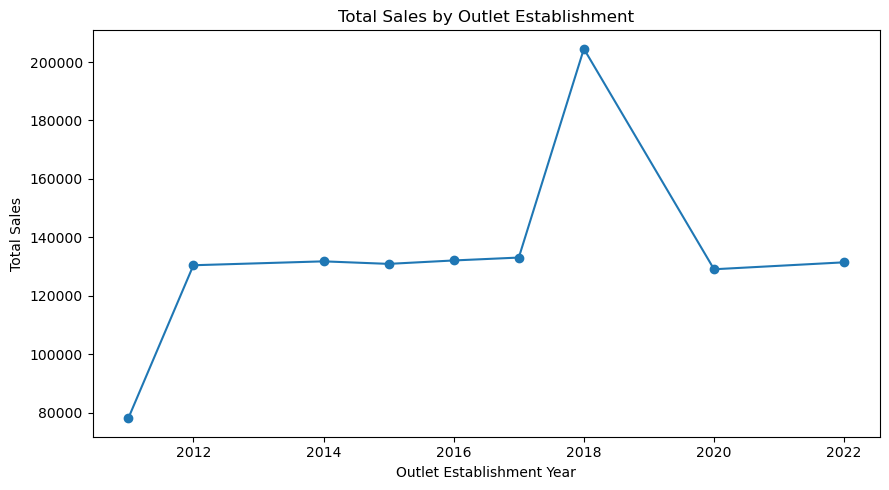

In [128]:
#Total sales by outlet establishment
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')
plt.title("Total Sales by Outlet Establishment")
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

In [116]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


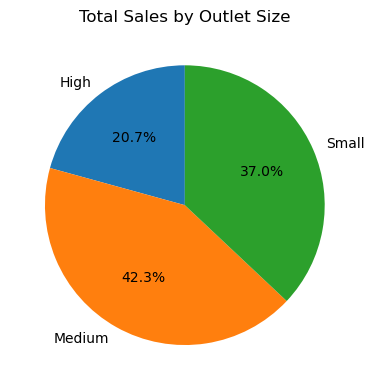

In [135]:
# Total sales by Outlet Size
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_outlet_size, labels=sales_by_outlet_size.index,autopct='%1.1f%%',startangle=90)
plt.title("Total Sales by Outlet Size")
plt.tight_layout()
plt.show()

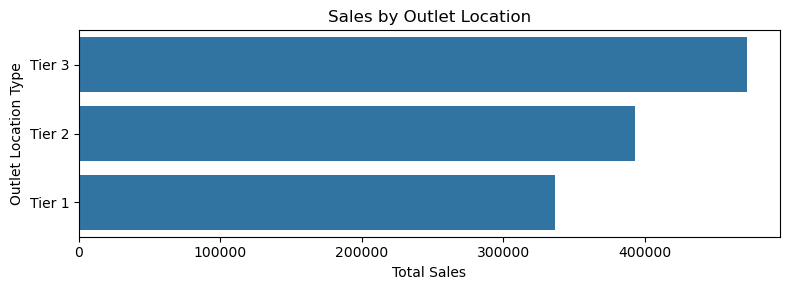

In [140]:
# Sales by Outlet location
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(data=sales_by_location, x='Sales', y='Outlet Location Type')
plt.title("Sales by Outlet Location")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")
plt.tight_layout()
plt.show()